In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

In [18]:
from google.colab import files
uploaded = files.upload()

Saving data[1].csv to data[1] (1).csv


In [19]:
import pandas as pd
df = pd.read_csv('data[1].csv')   # or the uploaded filename
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (569, 33)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df = df.drop(columns=['Unnamed: 32'], errors='ignore')
df = df.drop(columns=['id'], errors='ignore')

In [21]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [22]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [23]:
print("Class counts:\n", y.value_counts())
X.shape, y.shape

Class counts:
 diagnosis
0    357
1    212
Name: count, dtype: int64


((569, 30), (569,))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Stratified split to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#shapes
print("Train shape:", X_train_scaled.shape, "Test shape:", X_test_scaled.shape)


Train shape: (455, 30) Test shape: (114, 30)


In [25]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)
print("Train score (accuracy):", model.score(X_train_scaled, y_train))
print("Test score (accuracy):", model.score(X_test_scaled, y_test))


Train score (accuracy): 0.989010989010989
Test score (accuracy): 0.9736842105263158


Confusion matrix:
 [[71  1]
 [ 2 40]]
TN=71, FP=1, FN=2, TP=40

Precision: 0.9756
Recall   : 0.9524
F1-score : 0.9639
ROC-AUC  : 0.9960

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



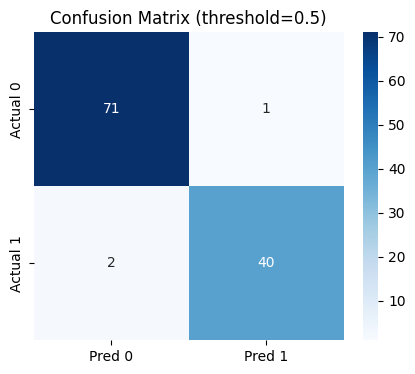

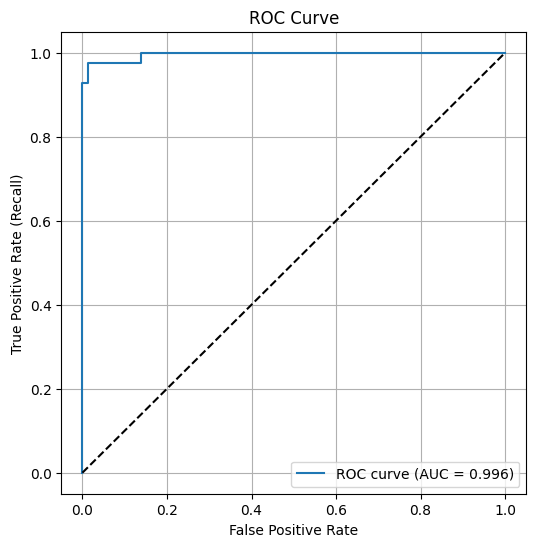

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
# Predicted class (default threshold = 0.5)
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("Confusion matrix:\n", cm)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0','Pred 1'], yticklabels=['Actual 0','Actual 1'])
plt.title('Confusion Matrix (threshold=0.5)')
plt.show()

# ROC curve
fpr, tpr, roc_thresh = roc_curve(y_test, y_probs)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Best F1 threshold: 0.24
threshold    0.24000
precision    0.97619
recall       0.97619
f1           0.97619
Name: 24, dtype: float64
Youden threshold (max TPR-FPR): 0.32061291568200484
TPR, FPR at Youden: 0.9761904761904762 0.013888888888888888


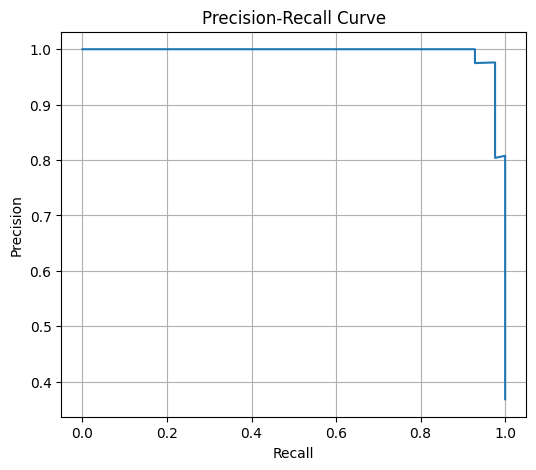

In [27]:
from sklearn.metrics import precision_recall_curve, f1_score

# metrics for a grid of thresholds
thresholds = np.linspace(0.0, 1.0, 101)
metrics = []
for t in thresholds:
    y_t = (y_probs >= t).astype(int)
    p = precision_score(y_test, y_t, zero_division=0)
    r = recall_score(y_test, y_t, zero_division=0)
    f1s = f1_score(y_test, y_t, zero_division=0)
    metrics.append((t, p, r, f1s))

metrics_df = pd.DataFrame(metrics, columns=['threshold','precision','recall','f1'])
metrics_df.head()

# threshold that maximizes F1
best_f1_row = metrics_df.iloc[metrics_df['f1'].idxmax()]
print("Best F1 threshold:", best_f1_row['threshold'])
print(best_f1_row)

#threshold by Youden's J statistic
youden_idx = np.argmax(tpr - fpr)
youden_thresh = roc_thresh[youden_idx]
print("Youden threshold (max TPR-FPR):", youden_thresh)
print("TPR, FPR at Youden:", tpr[youden_idx], fpr[youden_idx])

# Precision-Recall curve
precisions, recalls, pr_thresh = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()



Sample check: predict_proba vs sigmoid(decision_function) (first 8 cases)
[[3.74820545e-04 3.74820545e-04]
 [9.99999991e-01 9.99999991e-01]
 [4.30021162e-02 4.30021162e-02]
 [5.79925780e-01 5.79925780e-01]
 [5.11325986e-01 5.11325986e-01]
 [6.49703777e-04 6.49703777e-04]
 [7.63374241e-01 7.63374241e-01]
 [1.02652622e-03 1.02652622e-03]]


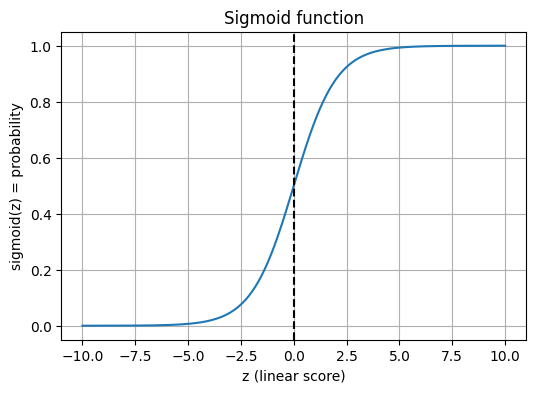

In [28]:
# Decision function z = Xw + b; sklearn provides decision_function
z = model.decision_function(X_test_scaled)   # raw scores
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

prob_from_z = sigmoid(z)
print("Sample check: predict_proba vs sigmoid(decision_function) (first 8 cases)")
print(np.vstack([y_probs[:8], prob_from_z[:8]]).T)

# Plot sigmoid
z_vals = np.linspace(-10, 10, 400)
plt.figure(figsize=(6,4))
plt.plot(z_vals, sigmoid(z_vals))
plt.axvline(0, color='k', linestyle='--')
plt.title('Sigmoid function')
plt.xlabel('z (linear score)')
plt.ylabel('sigmoid(z) = probability')
plt.grid(True)
plt.show()
